<a href="https://colab.research.google.com/github/EmilyRothrock/project_chd/blob/main/CHD_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import dataset
#! git clone https://github.com/DS3001/project_chd
data = pd.read_csv('/content/project_chd/fhs_train.csv')
data = data.drop("Unnamed: 0", axis = 1)
test_data = pd.read_csv('/content/project_chd/fhs_test.csv')
test_data = test_data.drop("Unnamed: 0", axis = 1)

data.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
2,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80,NaN,0
3,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0


In [ ]:
test_data.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,58,1.0,1,20.0,0.0,0,0,0,NaN,126.0,77.0,30.08,78.0,NaN,0
1,0,51,3.0,0,0.0,0.0,0,0,0,264.0,135.0,83.0,26.68,60.0,74.0,0
2,0,44,2.0,1,9.0,0.0,0,1,0,NaN,147.5,96.0,30.57,78.0,NaN,1
3,0,40,2.0,1,20.0,0.0,0,0,0,271.0,138.5,88.0,27.24,80.0,NaN,1
4,1,58,2.0,1,20.0,0.0,0,0,0,207.0,110.0,80.0,23.55,78.0,78.0,0


In [ ]:
# Drop NAs
data = data.dropna()
test_data = test_data.dropna()

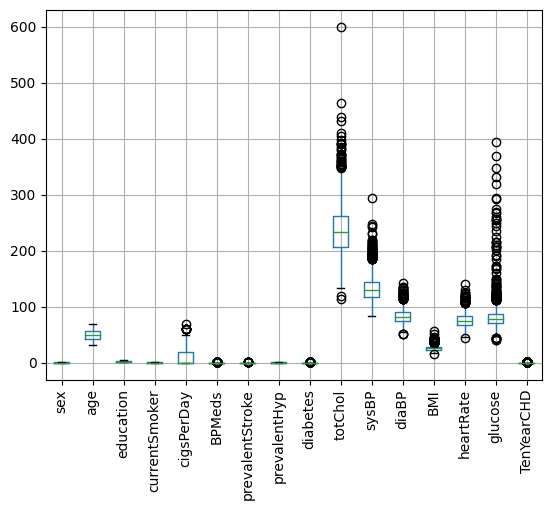

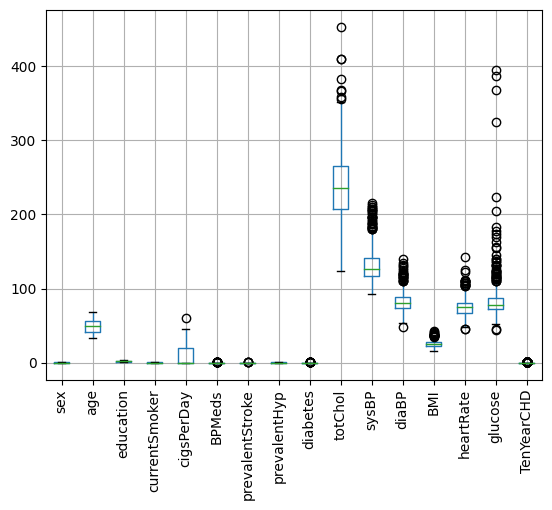

In [ ]:
# Look at outliers
data.boxplot(rot = 90)
plt.show()

test_data.boxplot(rot = 90)
plt.show()

In [ ]:
# Log transformation
data['totChol_log'] = np.log(data['totChol'])
data['sysBP_log'] = np.log(data['sysBP'])
data['diaBP_log'] = np.log(data['diaBP'])
data['BMI_log'] = np.log(data['BMI'])
data['heartRate_log'] = np.log(data['heartRate'])
data['glucose_log'] = np.log(data['glucose'])

test_data['totChol_log'] = np.log(test_data['totChol'])
test_data['sysBP_log'] = np.log(test_data['sysBP'])
test_data['diaBP_log'] = np.log(test_data['diaBP'])
test_data['BMI_log'] = np.log(test_data['BMI'])
test_data['heartRate_log'] = np.log(test_data['heartRate'])
test_data['glucose_log'] = np.log(test_data['glucose'])

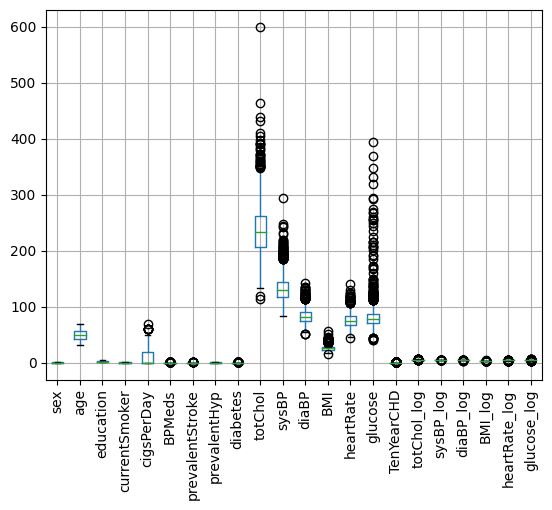

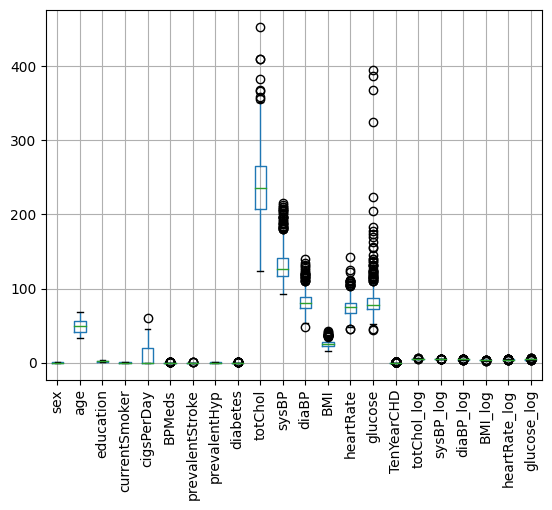

In [ ]:
# View boxplots again
data.boxplot(rot = 90)
plt.show()

test_data.boxplot(rot = 90)
plt.show()

[Text(0.5555054899382823, 0.9821428571428571, 'x[1] <= 55.5\nsquared_error = 0.131\nsamples = 2744\nvalue = 0.155'),
 Text(0.29837923222357443, 0.9464285714285714, 'x[1] <= 46.5\nsquared_error = 0.096\nsamples = 1988\nvalue = 0.108'),
 Text(0.14755737134909597, 0.9107142857142857, 'x[9] <= 398.5\nsquared_error = 0.063\nsamples = 1147\nvalue = 0.068'),
 Text(0.14477573018080667, 0.875, 'x[4] <= 9.5\nsquared_error = 0.062\nsamples = 1145\nvalue = 0.066'),
 Text(0.07382214881780251, 0.8392857142857143, 'x[14] <= 233.5\nsquared_error = 0.034\nsamples = 599\nvalue = 0.035'),
 Text(0.07104050764951321, 0.8035714285714286, 'x[10] <= 199.75\nsquared_error = 0.032\nsamples = 598\nvalue = 0.033'),
 Text(0.06825886648122392, 0.7678571428571429, 'x[17] <= 4.082\nsquared_error = 0.031\nsamples = 597\nvalue = 0.032'),
 Text(0.050851877607788594, 0.7321428571428571, 'x[18] <= 3.211\nsquared_error = 0.222\nsamples = 3\nvalue = 0.333'),
 Text(0.04807023643949931, 0.6964285714285714, 'squared_error = 0.

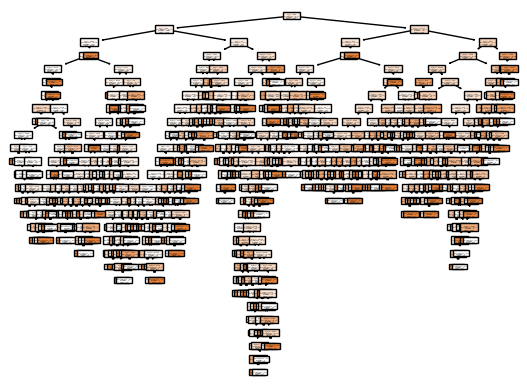

In [ ]:
# Decision Tree

# Import packages and libraries
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Process data
y = data['TenYearCHD']
X = data.drop(['TenYearCHD'], axis = 1)
y_test = test_data['TenYearCHD']
X_test = test_data.drop(['TenYearCHD'], axis = 1)

# Fit tree
tree = DecisionTreeRegressor()
tree = tree.fit(X, y)

# Make predictions on the test data
y_hat = tree.predict(X_test)

# Visualize results
plot_tree(tree, filled = True)

In [ ]:
# Statistics for above tree
SSE = np.sum((y_test - y_hat) ** 2)
TSS  =np.sum((y_test - np.mean(y)) ** 2)
rsq = 1 - SSE/TSS
print(rsq)

-0.829042234363687


This tree is very overfitting and is probably making splits on very small distinctions among a few observations, so we can truncate it and limit depth.

[Text(0.5028409090909091, 0.9166666666666666, 'age <= 55.5\nsquared_error = 0.131\nsamples = 2744\nvalue = 0.155'),
 Text(0.23863636363636365, 0.75, 'age <= 46.5\nsquared_error = 0.096\nsamples = 1988\nvalue = 0.108'),
 Text(0.11363636363636363, 0.5833333333333334, 'totChol_log <= 5.988\nsquared_error = 0.063\nsamples = 1147\nvalue = 0.068'),
 Text(0.09090909090909091, 0.4166666666666667, 'cigsPerDay <= 9.5\nsquared_error = 0.062\nsamples = 1145\nvalue = 0.066'),
 Text(0.045454545454545456, 0.25, 'glucose <= 233.5\nsquared_error = 0.034\nsamples = 599\nvalue = 0.035'),
 Text(0.022727272727272728, 0.08333333333333333, 'squared_error = 0.032\nsamples = 598\nvalue = 0.033'),
 Text(0.06818181818181818, 0.08333333333333333, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.13636363636363635, 0.25, 'diaBP <= 97.25\nsquared_error = 0.091\nsamples = 546\nvalue = 0.101'),
 Text(0.11363636363636363, 0.08333333333333333, 'squared_error = 0.083\nsamples = 515\nvalue = 0.091'),
 Text(0.1590

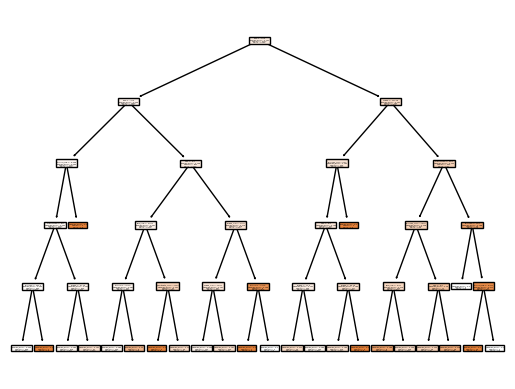

In [ ]:
# Another Decision Tree, but with a limited depth

# Process data
y = data['TenYearCHD']
X = data.drop(['TenYearCHD'], axis = 1)
y_test = test_data['TenYearCHD']
X_test = test_data.drop(['TenYearCHD'], axis = 1)

# Fit tree
tree = DecisionTreeRegressor(max_depth = 5)
tree = tree.fit(X, y)

# Make predictions on the test data
y_hat = tree.predict(X_test)

# Visualize results
plot_tree(tree, filled = True, feature_names = tree.feature_names_in_)

In [ ]:
# Statistics for above tree
SSE = np.sum((y_test - y_hat) ** 2)
TSS  =np.sum((y_test - np.mean(y)) ** 2)
rsq = 1 - SSE/TSS
print(rsq)

0.05216352012808434


[Text(0.5, 0.875, 'age <= 55.5\nsquared_error = 0.131\nsamples = 2744\nvalue = 0.155'),
 Text(0.25, 0.625, 'age <= 46.5\nsquared_error = 0.096\nsamples = 1988\nvalue = 0.108'),
 Text(0.125, 0.375, 'totChol_log <= 5.988\nsquared_error = 0.063\nsamples = 1147\nvalue = 0.068'),
 Text(0.0625, 0.125, 'squared_error = 0.062\nsamples = 1145\nvalue = 0.066'),
 Text(0.1875, 0.125, 'squared_error = 0.0\nsamples = 2\nvalue = 1.0'),
 Text(0.375, 0.375, 'sex <= 0.5\nsquared_error = 0.136\nsamples = 841\nvalue = 0.162'),
 Text(0.3125, 0.125, 'squared_error = 0.097\nsamples = 466\nvalue = 0.109'),
 Text(0.4375, 0.125, 'squared_error = 0.175\nsamples = 375\nvalue = 0.227'),
 Text(0.75, 0.625, 'sysBP_log <= 4.975\nsquared_error = 0.201\nsamples = 756\nvalue = 0.278'),
 Text(0.625, 0.375, 'glucose_log <= 5.34\nsquared_error = 0.164\nsamples = 426\nvalue = 0.207'),
 Text(0.5625, 0.125, 'squared_error = 0.159\nsamples = 422\nvalue = 0.199'),
 Text(0.6875, 0.125, 'squared_error = 0.0\nsamples = 4\nvalue = 

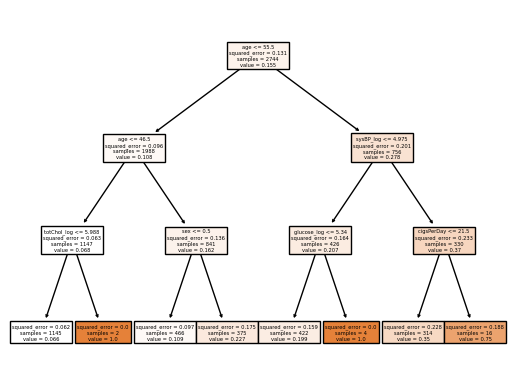

In [ ]:
# Let's try to make it even better!

# Process data
y = data['TenYearCHD']
X = data.drop(['TenYearCHD'], axis = 1)
y_test = test_data['TenYearCHD']
X_test = test_data.drop(['TenYearCHD'], axis = 1)

# Fit tree
tree = DecisionTreeRegressor(max_depth = 3)
tree = tree.fit(X, y)

# Make predictions on the test data
y_hat = tree.predict(X_test)

# Visualize results
plot_tree(tree, filled = True, feature_names = tree.feature_names_in_)

In [ ]:
# Statistics for above tree
SSE = np.sum((y_test - y_hat) ** 2)
TSS  =np.sum((y_test - np.mean(y)) ** 2)
rsq = 1 - SSE/TSS
print(rsq)

0.06161407743229941


[Text(0.48245223445595853, 0.9545454545454546, 'age <= 55.5\nsquared_error = 0.131\nsamples = 2744\nvalue = 0.155'),
 Text(0.20170822538860103, 0.8636363636363636, 'age <= 46.5\nsquared_error = 0.096\nsamples = 1988\nvalue = 0.108'),
 Text(0.0783678756476684, 0.7727272727272727, 'totChol_log <= 5.988\nsquared_error = 0.063\nsamples = 1147\nvalue = 0.068'),
 Text(0.07318652849740932, 0.6818181818181818, 'cigsPerDay <= 9.5\nsquared_error = 0.062\nsamples = 1145\nvalue = 0.066'),
 Text(0.034974093264248704, 0.5909090909090909, 'sysBP_log <= 5.297\nsquared_error = 0.034\nsamples = 599\nvalue = 0.035'),
 Text(0.029792746113989636, 0.5, 'glucose_log <= 5.438\nsquared_error = 0.032\nsamples = 598\nvalue = 0.033'),
 Text(0.02461139896373057, 0.4090909090909091, 'diaBP <= 59.25\nsquared_error = 0.031\nsamples = 597\nvalue = 0.032'),
 Text(0.010362694300518135, 0.3181818181818182, 'totChol <= 180.5\nsquared_error = 0.222\nsamples = 3\nvalue = 0.333'),
 Text(0.0051813471502590676, 0.2272727272727

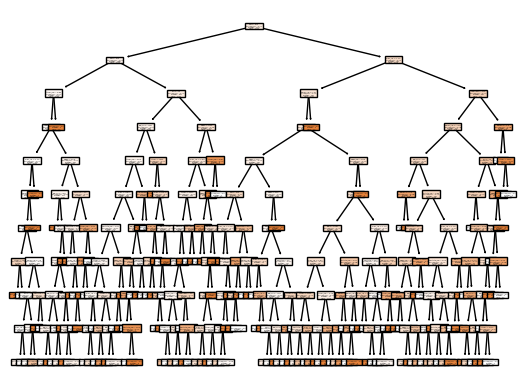

In [ ]:
# Trying to improve r^2 value

# Process data
y = data['TenYearCHD']
X = data.drop(['TenYearCHD'], axis = 1)
y_test = test_data['TenYearCHD']
X_test = test_data.drop(['TenYearCHD'], axis = 1)

# Fit tree
tree = DecisionTreeRegressor(max_depth = 10)
tree = tree.fit(X, y)

# Make predictions on the test data
y_hat = tree.predict(X_test)

# Visualize results
plot_tree(tree, filled = True, feature_names = tree.feature_names_in_)

In [ ]:
# Statistics for above tree
SSE = np.sum((y_test - y_hat) ** 2)
TSS  =np.sum((y_test - np.mean(y)) ** 2)
rsq = 1 - SSE/TSS
print(rsq)

# Oh that's not good at all

-0.22093002218817626


[Text(0.5224184782608695, 0.9375, 'age <= 55.5\nsquared_error = 0.131\nsamples = 2744\nvalue = 0.155'),
 Text(0.2452445652173913, 0.8125, 'age <= 46.5\nsquared_error = 0.096\nsamples = 1988\nvalue = 0.108'),
 Text(0.08967391304347826, 0.6875, 'totChol_log <= 5.988\nsquared_error = 0.063\nsamples = 1147\nvalue = 0.068'),
 Text(0.07880434782608696, 0.5625, 'cigsPerDay <= 9.5\nsquared_error = 0.062\nsamples = 1145\nvalue = 0.066'),
 Text(0.043478260869565216, 0.4375, 'glucose_log <= 5.438\nsquared_error = 0.034\nsamples = 599\nvalue = 0.035'),
 Text(0.03260869565217391, 0.3125, 'sysBP <= 199.75\nsquared_error = 0.032\nsamples = 598\nvalue = 0.033'),
 Text(0.021739130434782608, 0.1875, 'diaBP_log <= 4.082\nsquared_error = 0.031\nsamples = 597\nvalue = 0.032'),
 Text(0.010869565217391304, 0.0625, 'squared_error = 0.222\nsamples = 3\nvalue = 0.333'),
 Text(0.03260869565217391, 0.0625, 'squared_error = 0.029\nsamples = 594\nvalue = 0.03'),
 Text(0.043478260869565216, 0.1875, 'squared_error = 

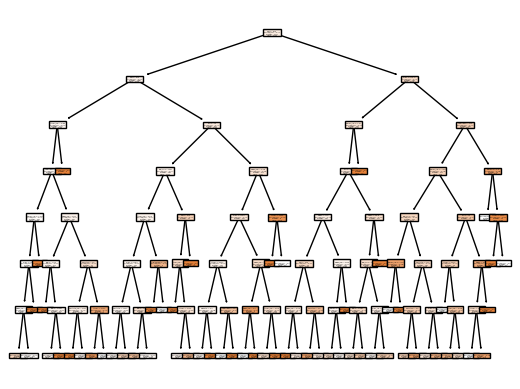

In [ ]:
# Trying again

# Process data
y = data['TenYearCHD']
X = data.drop(['TenYearCHD'], axis = 1)
y_test = test_data['TenYearCHD']
X_test = test_data.drop(['TenYearCHD'], axis = 1)

# Fit tree
tree = DecisionTreeRegressor(max_depth = 7)
tree = tree.fit(X, y)

# Make predictions on the test data
y_hat = tree.predict(X_test)

# Visualize results
plot_tree(tree, filled = True, feature_names = tree.feature_names_in_)

In [ ]:
# Statistics for above tree
SSE = np.sum((y_test - y_hat) ** 2)
TSS  =np.sum((y_test - np.mean(y)) ** 2)
rsq = 1 - SSE/TSS
print(rsq)

-0.04945335555628283


[Text(0.5, 0.8333333333333334, 'age <= 55.5\nsquared_error = 0.131\nsamples = 2744\nvalue = 0.155'),
 Text(0.25, 0.5, 'age <= 46.5\nsquared_error = 0.096\nsamples = 1988\nvalue = 0.108'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.063\nsamples = 1147\nvalue = 0.068'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.136\nsamples = 841\nvalue = 0.162'),
 Text(0.75, 0.5, 'sysBP_log <= 4.975\nsquared_error = 0.201\nsamples = 756\nvalue = 0.278'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.164\nsamples = 426\nvalue = 0.207'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.233\nsamples = 330\nvalue = 0.37')]

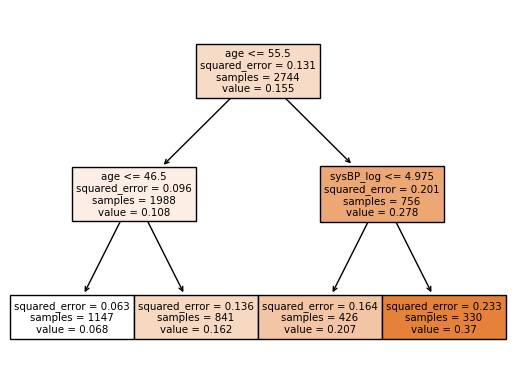

In [ ]:
# Try making max_depth even lower instead of higher?

# Process data
y = data['TenYearCHD']
X = data.drop(['TenYearCHD'], axis = 1)
y_test = test_data['TenYearCHD']
X_test = test_data.drop(['TenYearCHD'], axis = 1)

# Fit tree
tree = DecisionTreeRegressor(max_depth = 2)
tree = tree.fit(X, y)

# Make predictions on the test data
y_hat = tree.predict(X_test)

# Visualize results
plot_tree(tree, filled = True, feature_names = tree.feature_names_in_)

In [ ]:
# Statistics for above tree
SSE = np.sum((y_test - y_hat) ** 2)
TSS  =np.sum((y_test - np.mean(y)) ** 2)
rsq = 1 - SSE/TSS
print(rsq)

0.05963970137419505


Looks like setting max_depth = 3 had the highest r^2 value, while also showing us an accurate representation of the relationships between the data